# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [55]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale
from skimage.morphology import disk
from skimage.morphology import erosion
from skimage.morphology import dilation
from skimage.morphology import opening
from skimage.morphology import closing
from skimage import filters
from skimage import measure
from skimage import draw

Pretty printing has been turned OFF


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

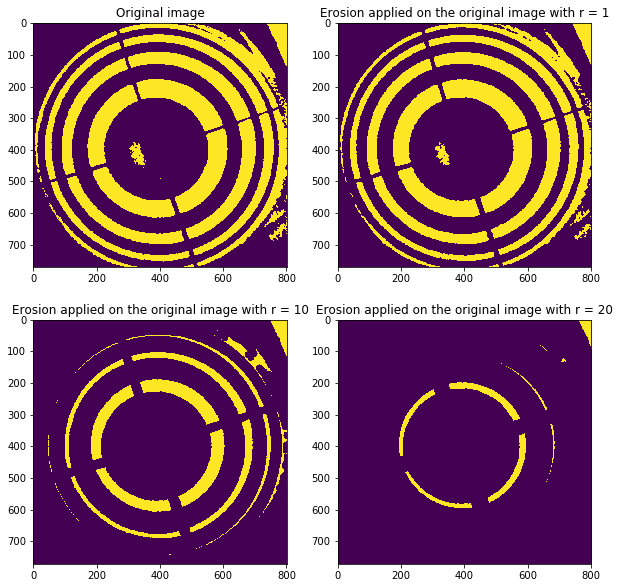

In [12]:
img_path = './images/'
img_name = 'FindingContours.png'
image = io.imread(img_path.__add__(img_name))
ratio = [1,10,20]
i = [1,2,3]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax = axes.ravel()
ax[0].imshow(image)
ax[0].set_title('Original image')
for r,i in zip(ratio,i):
    image_erosion = erosion(image,disk(r)) 
    ax[i].imshow(image_erosion)
    ax[i].set_title('Erosion applied on the original image with r = ' + str(r))

** Q.1.2 Dilation **

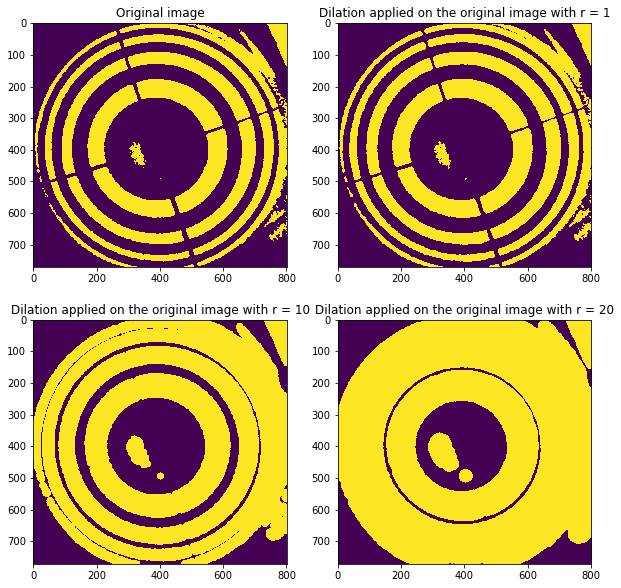

In [13]:
ratio = [1,10,20]
i = [1,2,3]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax = axes.ravel()
ax[0].imshow(image)
ax[0].set_title('Original image')
for r,i in zip(ratio,i):
    image_erosion = dilation(image,disk(r)) 
    ax[i].imshow(image_erosion)
    ax[i].set_title('Dilation applied on the original image with r = ' + str(r))

** Q.1.3 Opening **

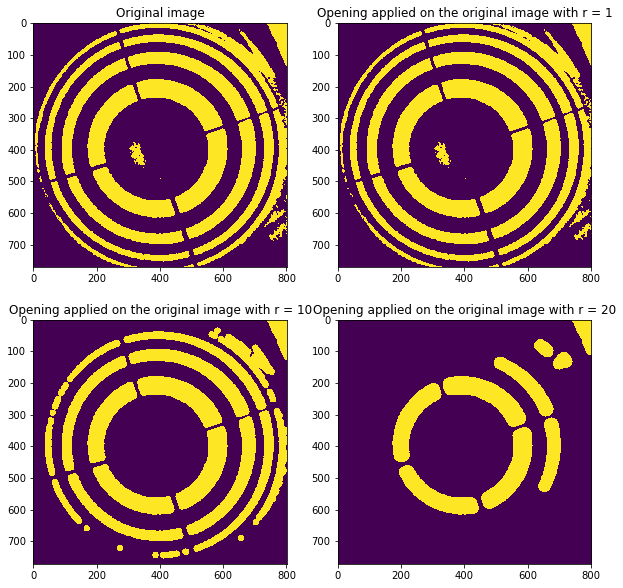

In [14]:
ratio = [1,10,20]
i = [1,2,3]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax = axes.ravel()
ax[0].imshow(image)
ax[0].set_title('Original image')
for r,i in zip(ratio,i):
    image_erosion = opening(image,disk(r)) 
    ax[i].imshow(image_erosion)
    ax[i].set_title('Opening applied on the original image with r = ' + str(r))

** Q.1.4 Closing**

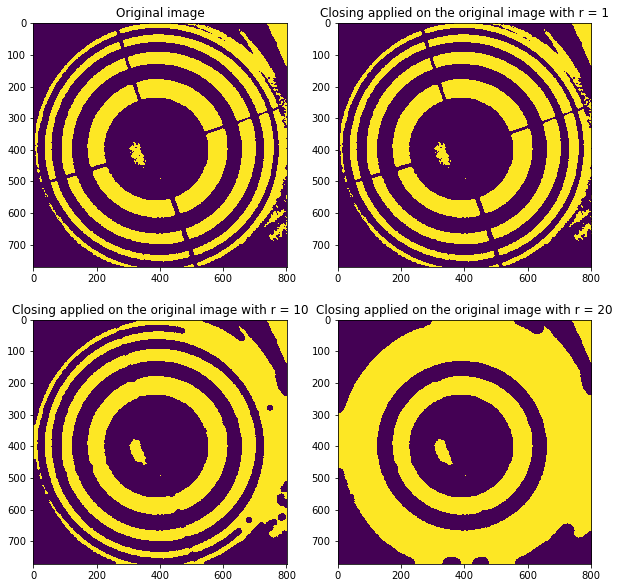

In [15]:
ratio = [1,10,20]
i = [1,2,3]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax = axes.ravel()
ax[0].imshow(image)
ax[0].set_title('Original image')
for r,i in zip(ratio,i):
    image_closing = closing(image,disk(r)) 
    ax[i].imshow(image_closing)
    ax[i].set_title('Closing applied on the original image with r = ' + str(r))

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

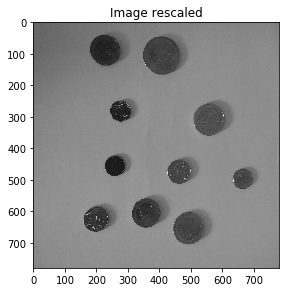

In [34]:
img_path = './images/'
img_name = 'coins.jpg'
image = rescale(img_as_ubyte(io.imread(img_path.__add__(img_name))),.25)
image = rgb2gray(image)
io.imshow(image)
plt.title('Image rescaled')

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

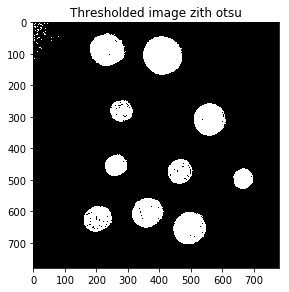

In [38]:
thresh = filters.threshold_otsu(image,256)
binary = image <= thresh
io.imshow(binary)
plt.title('Thresholded image with otsu')

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

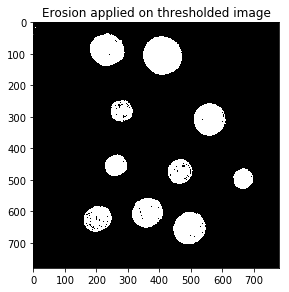

In [82]:
image_opening = opening(binary) 
io.imshow(image_opening)
plt.title('Erosion applied on thresholded image')

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


The number of region is : 16
The radius of the region is : 1 pixels
The radius of the region is : 1 pixels
The radius of the region is : 1 pixels
The radius of the region is : 53 pixels
The radius of the region is : 1 pixels
The radius of the region is : 61 pixels
The radius of the region is : 1 pixels
The radius of the region is : 34 pixels
The radius of the region is : 50 pixels
The radius of the region is : 35 pixels
The radius of the region is : 38 pixels
The radius of the region is : 32 pixels
The radius of the region is : 48 pixels
The radius of the region is : 41 pixels
The radius of the region is : 51 pixels


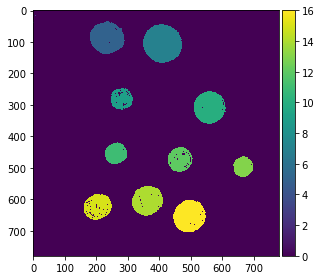

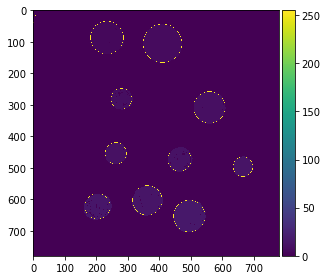

In [84]:
img_label = measure.label(image_opening)
regions = measure.regionprops(img_label)
io.imshow(img_label)
print('The number of region is : {}'.format(len(regions)))
for ir, region in enumerate(regions):
    if ir == 0:
        continue
    r = region.equivalent_diameter / 2
    print('The radius of the region is : {:.0f} pixels'.format(r))
    c = draw.circle_perimeter(int(region.centroid[0]),int(region.centroid[1]),int(r))
    img_label[c[0],c[1]] = 255
plt.figure()
io.imshow(img_label)

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

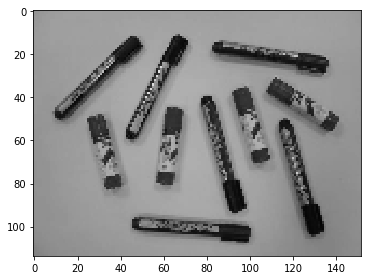

In [69]:
img_path = './images/'
img_name = 'objets4.jpg'
image = rescale(img_as_ubyte(io.imread(img_path.__add__(img_name))),.25)
image = rgb2gray(image)
io.imshow(image)